In [1]:
using ShapeRetrieval
using Arpack
using LinearAlgebra
using PlotlyJS
# using Plots
# plotlyjs()

### Visualization Tools

In [10]:
bunny = load_obj("./meshes/gourd.obj")
# bunny = normalize_mesh(bunny)
V = bunny.V
F = bunny.F
println("Area: ", sum(vertex_area(bunny)))
# @time L = cot_laplacian(bunny)
heat_signal = zeros(bunny.nv)
heat_signal[[1,100, 30]] .= 1.0
# @time bunny_heat = heat_diffusion(bunny, heat_signal, t=0.05)
@time bunny_heat = heat_integrator(bunny, heat_signal, dt=.001, steps=10);

Area: 10.198997091252917
  0.013125 seconds (9.18 k allocations: 4.272 MiB, 73.73% gc time)

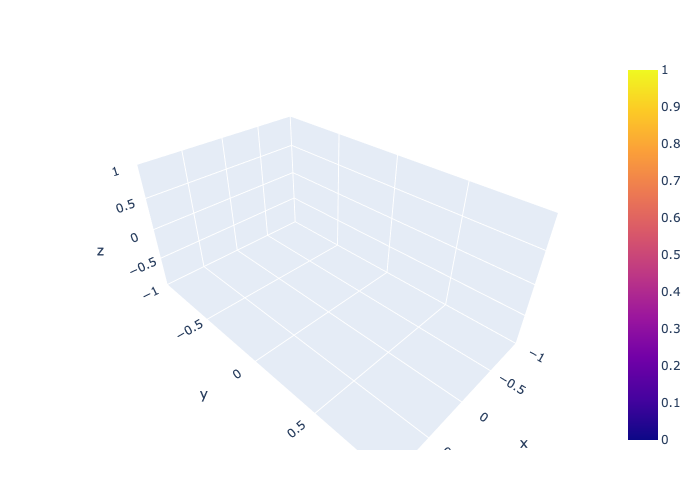

In [20]:
V = bunny.V
plotlybunny = mesh3d(
    x=V[1,:],
    y=V[2,:],
    z=V[3,:],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=bunny_heat./maximum(bunny_heat),
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=F[1,:],
    j=F[2,:],
    k=F[3,:],
    alphahull=1,
    showscale=true)
PlotlyJS.plot(plotlybunny)

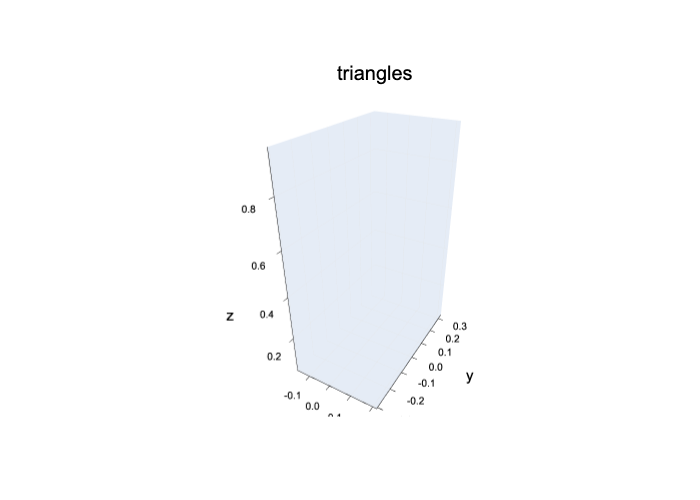

In [3]:
V = bunny.V
F = bunny.F
x = V[1,:]
y = V[2,:]
z = V[3,:]
i = F[1,:]
j = F[2,:]
k = F[3,:]
Plots.mesh3d(x, y, z; connections = (i, j, k), title = "triangles", xlabel = "x", ylabel = "y", zlabel = "z", legend = :none, margin = 2 * Plots.mm)

In [77]:
fig = Figure(resolution = (1000, 1000))
ax1 = Axis3(fig[1,1])
colors = bunny_heat
s = mesh!(ax1, bunny.V, bunny.F', color=colors)
display(fig)

JSServe.App(WGLMakie.var"#23#25"{WGLMakie.Screen, Scene}(WGLMakie.Screen(Channel{WGLMakie.ThreeDisplay}(1), nothing, nothing, Scene (1000px, 1000px):
  0 Plots
  1 Child Scene:
    └ Scene (1000px, 1000px), Set{String}()), Scene (1000px, 1000px):
  0 Plots
  1 Child Scene:
    └ Scene (1000px, 1000px)), Base.RefValue{Union{Nothing, JSServe.Session}}(nothing), "JSServe App", false)

WGLMakie.Screen(Channel{WGLMakie.ThreeDisplay}(1), nothing, true, Scene (1000px, 1000px):
  0 Plots
  1 Child Scene:
    └ Scene (1000px, 1000px), Set{String}())

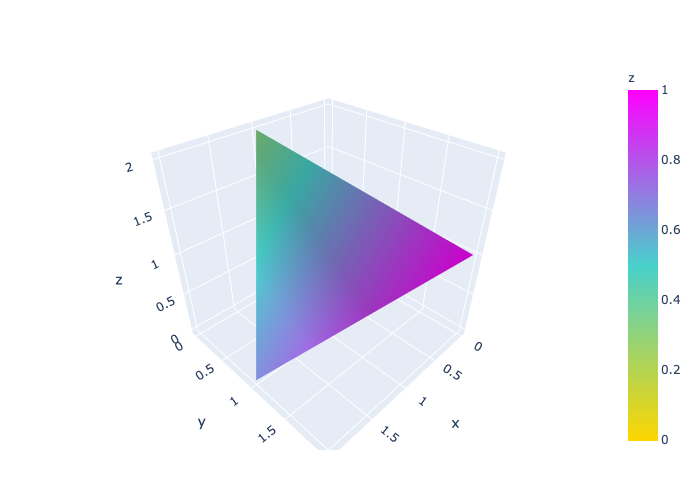

In [62]:
mesh = mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=[0, 0.33, 0.66, 1],
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true)
PlotlyJS.plot(mesh)

In [2]:
bunny = load_obj("../meshes/bunny.obj")
# dragon = load_obj("../meshes/dragon.obj")

ShapeRetrieval.Mesh([-0.00341018 -0.08171916 … -0.069413 -0.0550398; 0.13031957 0.15250145 … 0.15121847 0.0573097; 0.02175437 0.02965609 … -0.04453854 0.0169909], [1069 1058 … 1318 1320; 1647 909 … 1320 2443; 1578 939 … 2503 2503], Matrix{Float64}(undef, 0, 1))

### Heat Diffusion

In [4]:
fig = Figure()
scene = fig.scene
ax1 = Axis3(fig[1,1])
# colors = repeat([:red], 2503)
s = mesh!(ax1, bunny.V, bunny.F)
# mesh(bunny.V, bunny.F, color=colors)
fig

UndefVarError: UndefVarError: `Figure` not defined